In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
uploaded = files.upload()
data = pd.read_csv('data 2.csv')

Saving data 2.csv to data 2.csv


####Initial dataset overview

In [ ]:
print("Dataset shape:", data.shape)
print("First few rows of the dataset:")
display(data.head())

Dataset shape: (569, 33)
First few rows of the dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


####Checking for missing values

In [ ]:
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_

In [ ]:
data = data.drop(columns=['Unnamed: 32'], errors='ignore')


In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


In [ ]:
print("Data Types:")
print(data.dtypes.value_counts())

Data Types:
float64    30
int64       2
Name: count, dtype: int64


In [ ]:
print("Statistical summary:")
display(data.describe())

Statistical summary:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


####Detecting missing Values

In [ ]:
missing_cols = data.columns[data.isnull().any()]
if not missing_cols.empty:
    print(f"Columns with missing values: {list(missing_cols)}")
else:
    print("No missing values detected.")

No missing values detected.


####Outliers

In [ ]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

outliers = {col: detect_outliers(data[col]) for col in data.select_dtypes(include=['float64']).columns}
outlier_counts = {col: len(vals) for col, vals in outliers.items() if len(vals) > 0}
print("Outliers detected in the following columns:")
print(outlier_counts)

Outliers detected in the following columns:
{'radius_mean': 14, 'texture_mean': 7, 'perimeter_mean': 13, 'area_mean': 25, 'smoothness_mean': 6, 'compactness_mean': 16, 'concavity_mean': 18, 'concave points_mean': 10, 'symmetry_mean': 15, 'fractal_dimension_mean': 15, 'radius_se': 38, 'texture_se': 20, 'perimeter_se': 38, 'area_se': 65, 'smoothness_se': 30, 'compactness_se': 28, 'concavity_se': 22, 'concave points_se': 19, 'symmetry_se': 27, 'fractal_dimension_se': 28, 'radius_worst': 17, 'texture_worst': 5, 'perimeter_worst': 15, 'area_worst': 35, 'smoothness_worst': 7, 'compactness_worst': 16, 'concavity_worst': 12, 'symmetry_worst': 23, 'fractal_dimension_worst': 24}


###Five-number summary

In [ ]:
numerical_cols = data.select_dtypes(include=['float64']).columns
five_num_summary = data[numerical_cols].describe(percentiles=[0.25, 0.5, 0.75]).T
five_num_summary['Range'] = five_num_summary['max'] - five_num_summary['min']
print("Five-number summary:")
display(five_num_summary)

Five-number summary:


,count,mean,std,min,25%,50%,75%,max,Range
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,21.129000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,29.570000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,144.710000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,2357.500000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,0.110770
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,0.326020
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,0.426800
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,0.201200
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,0.198000
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,0.047480


####Correlation analysis

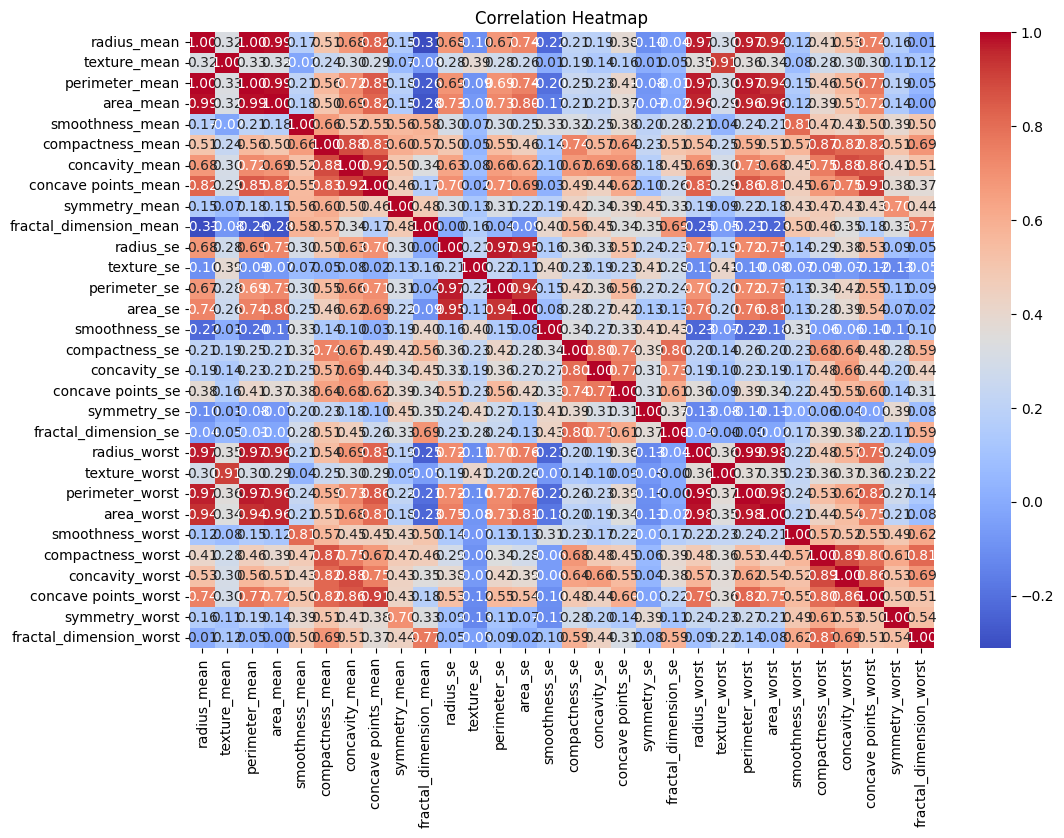

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##Visualization

####Diagnosis distribution

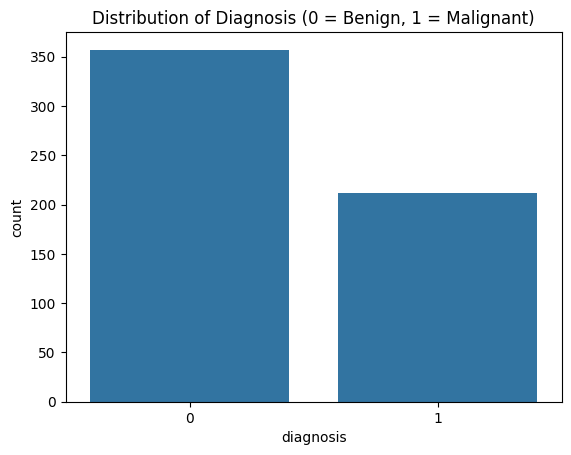

In [ ]:
sns.countplot(x='diagnosis', data=data)
plt.title("Distribution of Diagnosis (0 = Benign, 1 = Malignant)")
plt.show()

####Distribution of numerical features

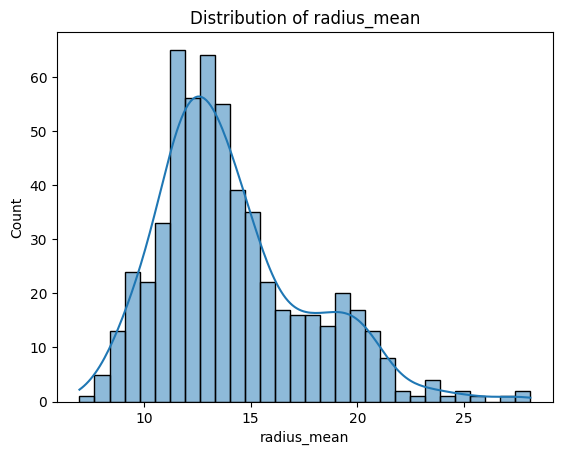

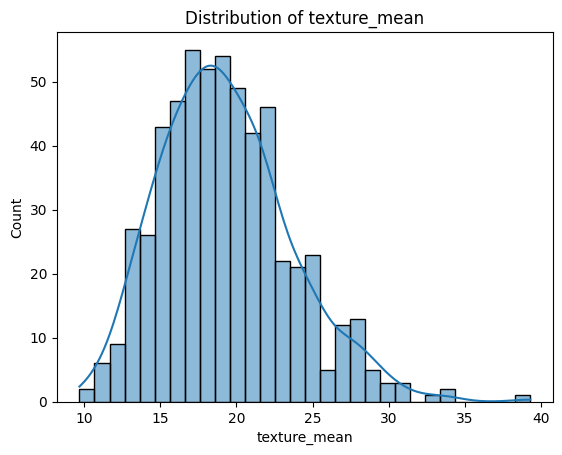

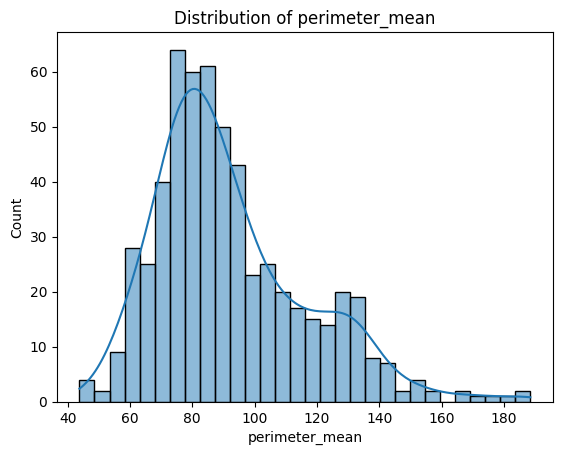

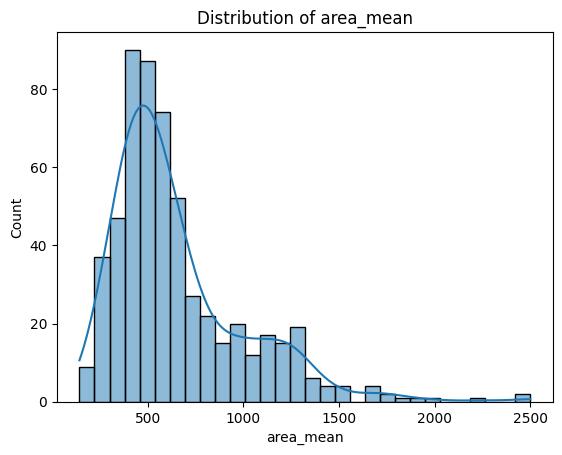

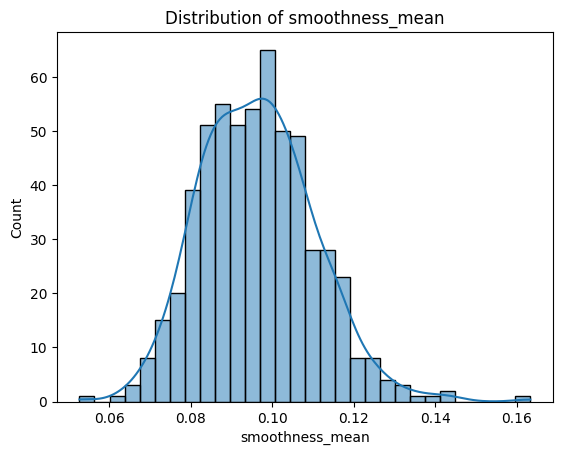

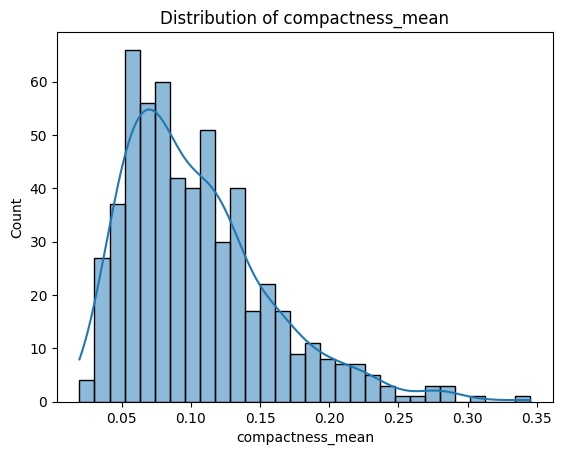

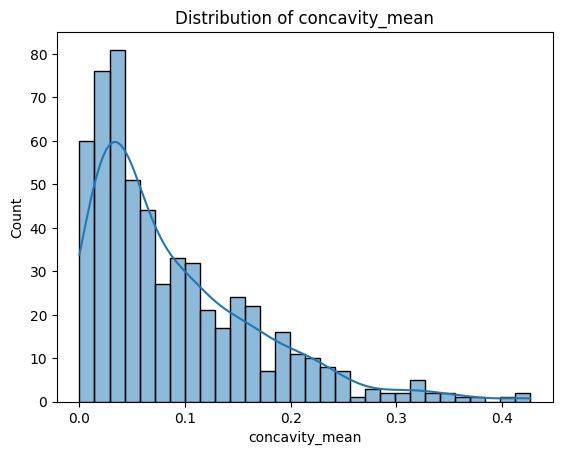

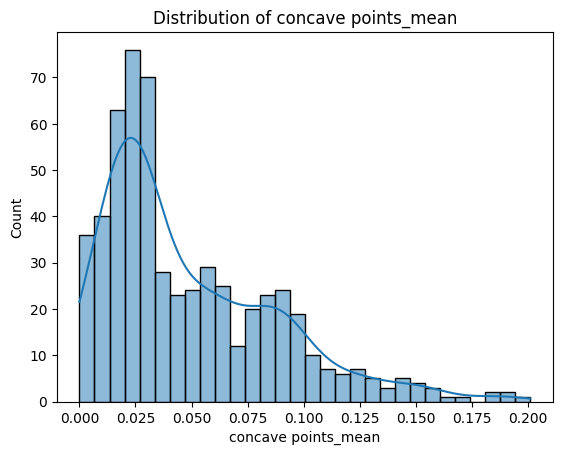

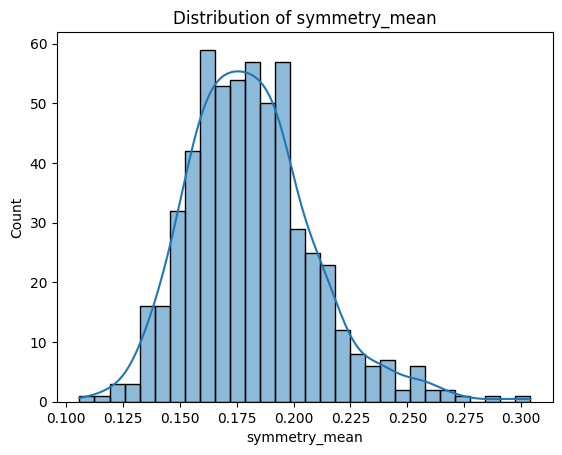

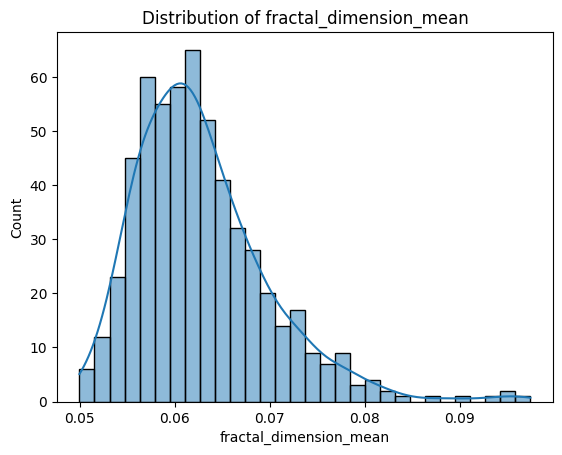

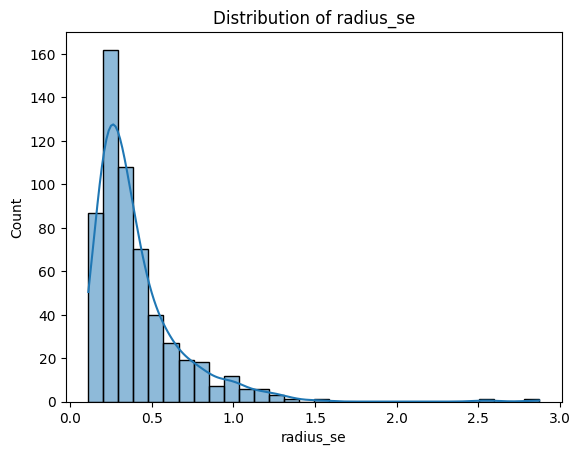

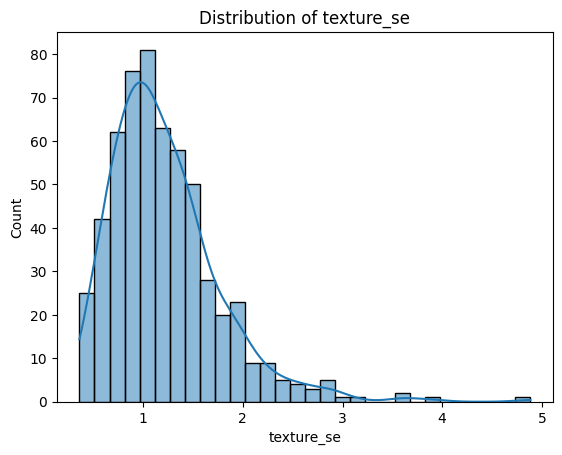

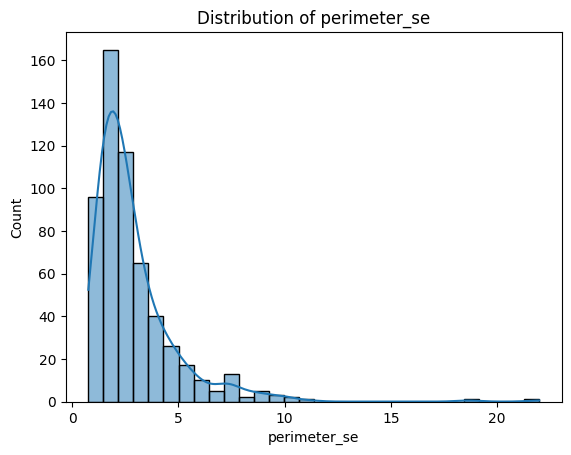

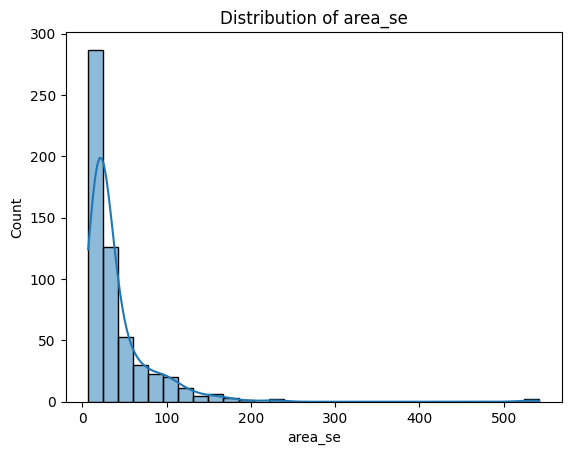

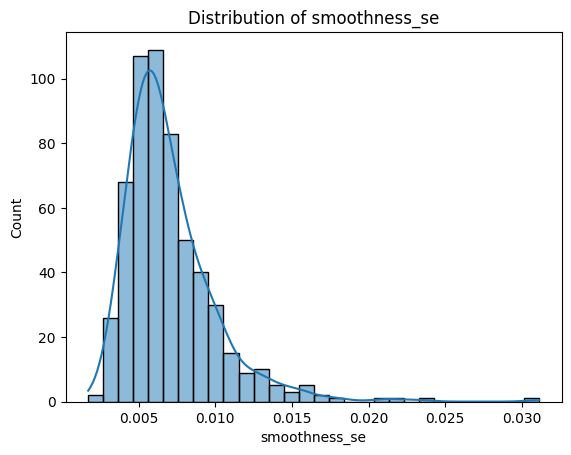

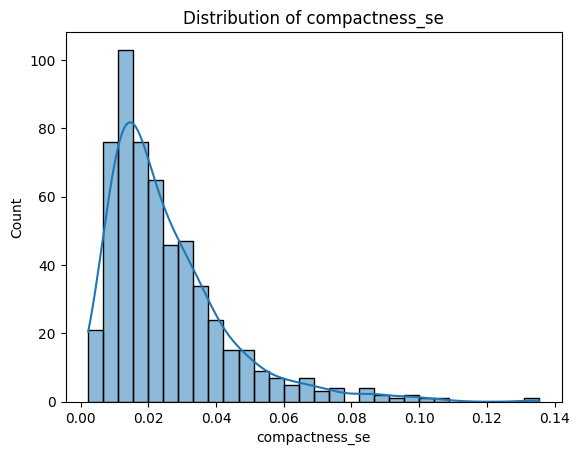

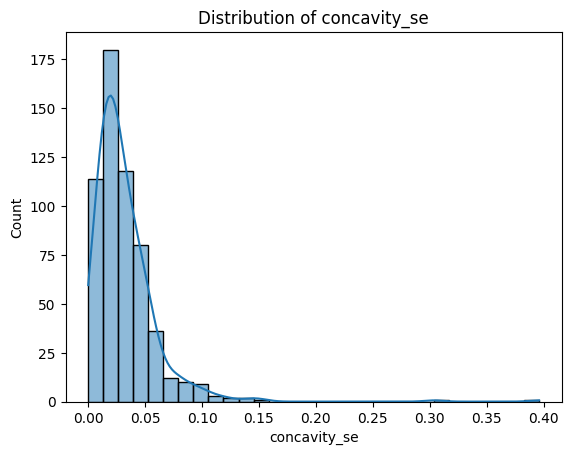

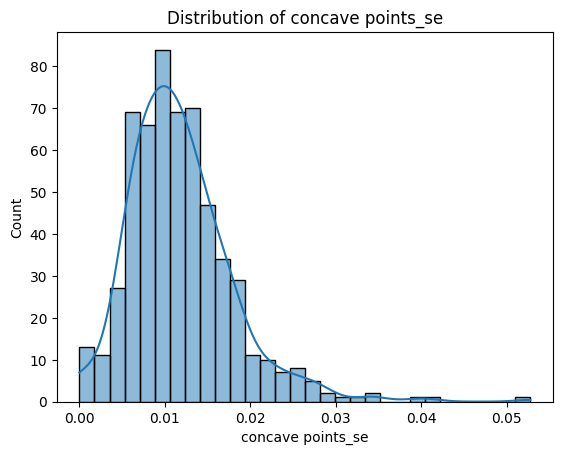

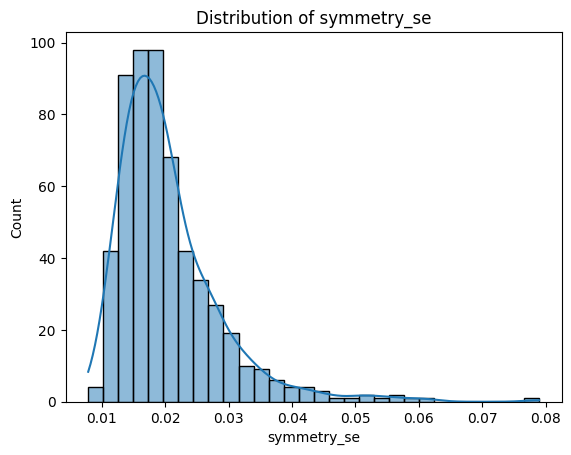

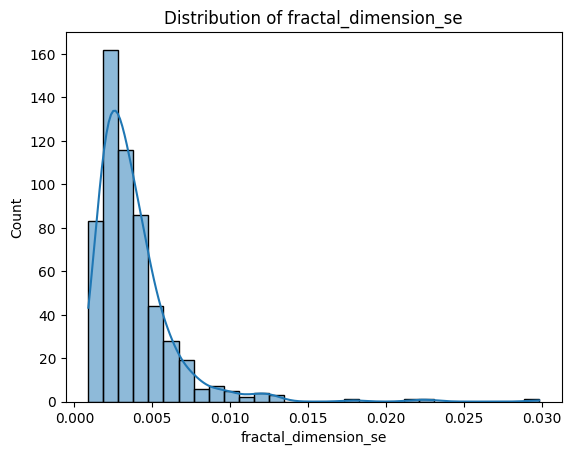

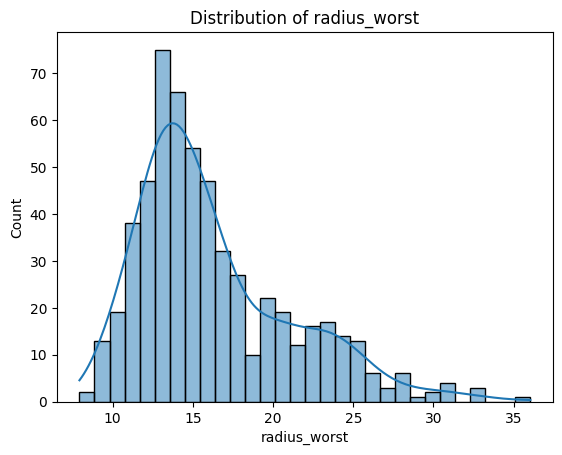

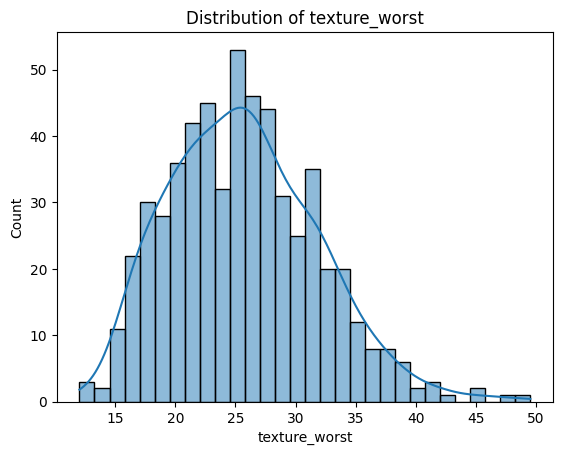

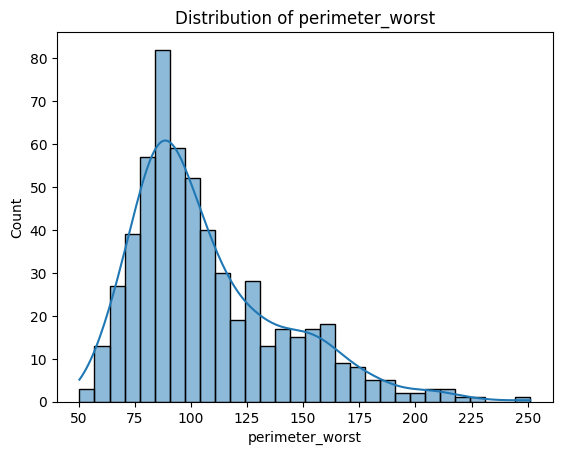

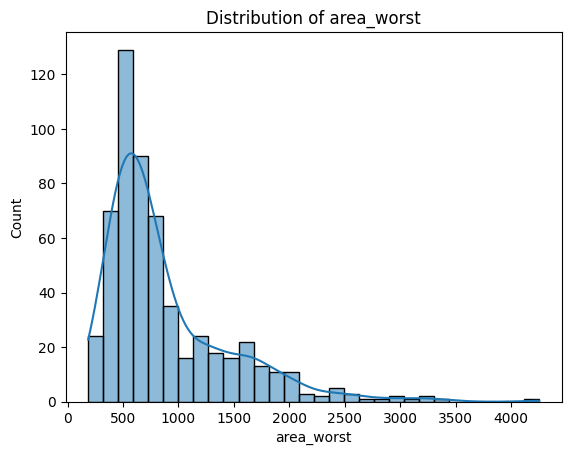

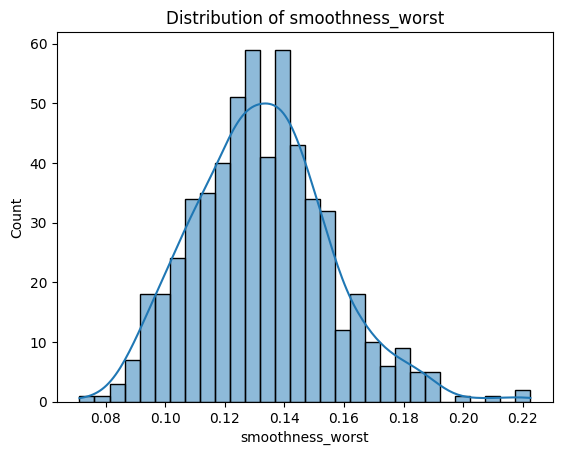

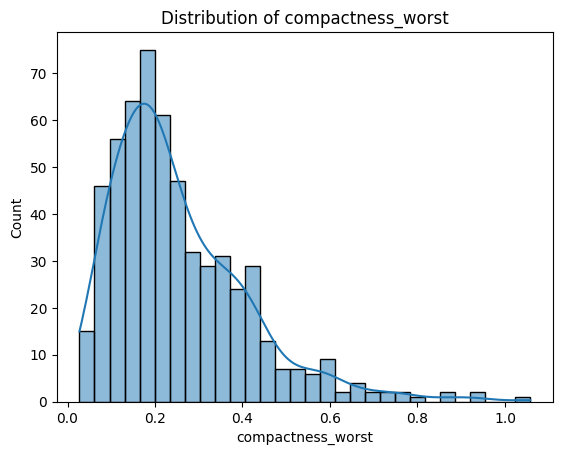

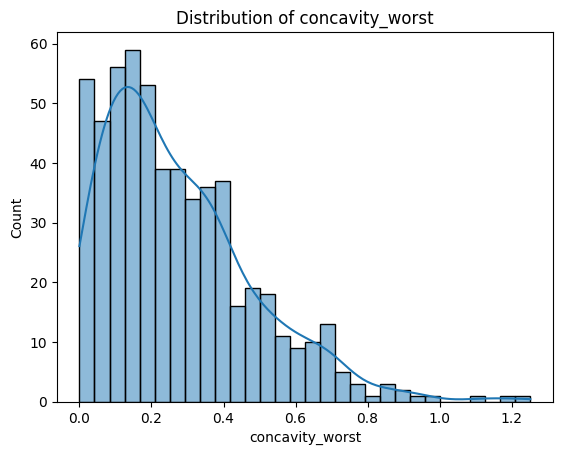

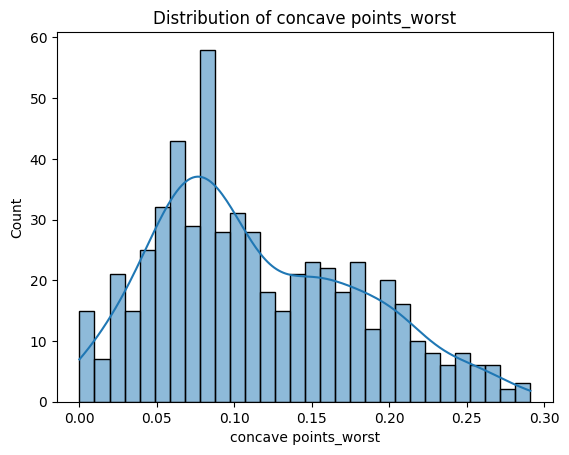

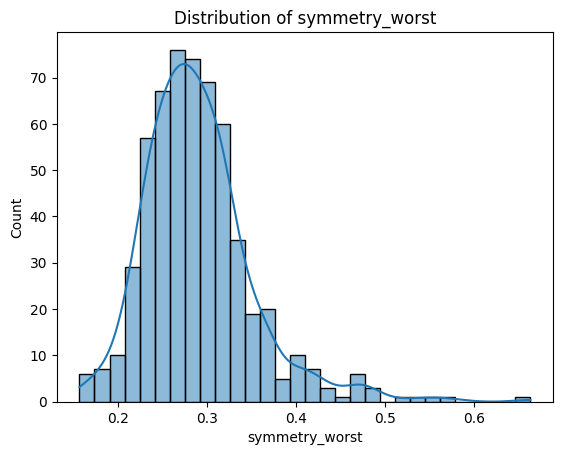

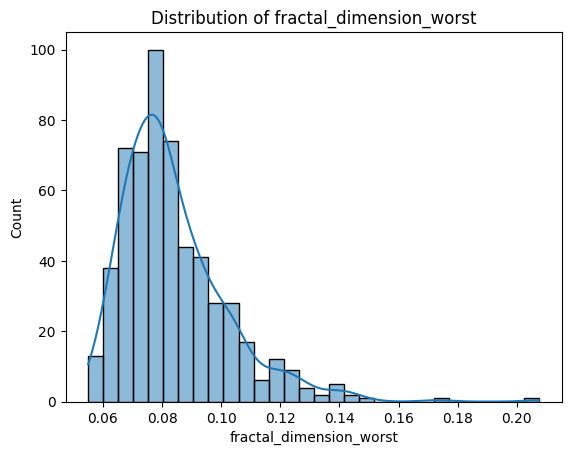

In [ ]:
for column in numerical_cols:
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()


####Violin and Box Plots for Numerical Features by Diagnosis

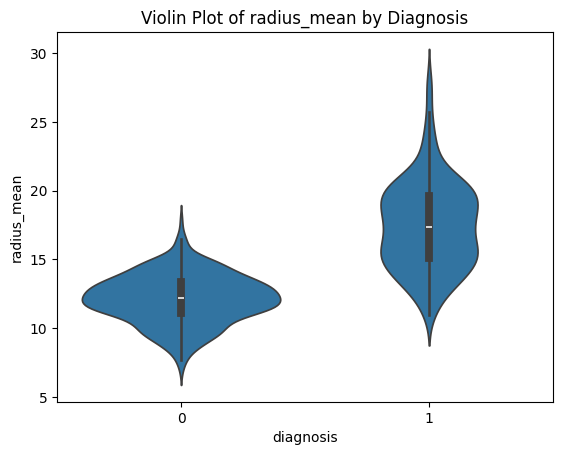

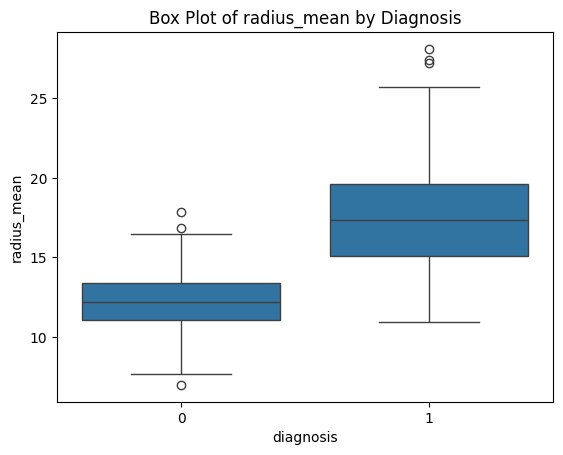

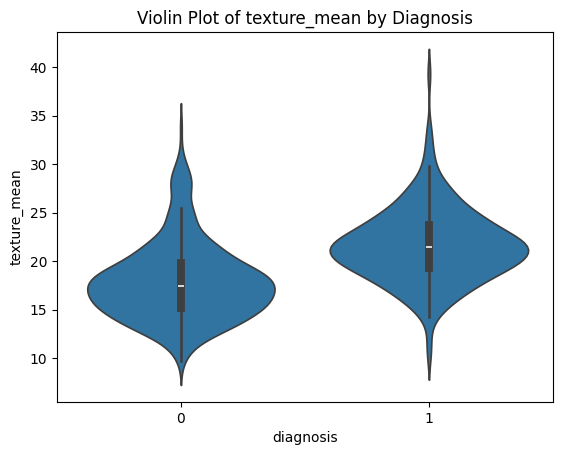

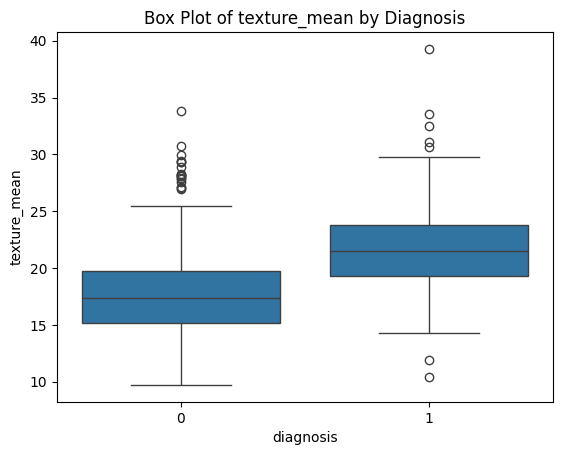

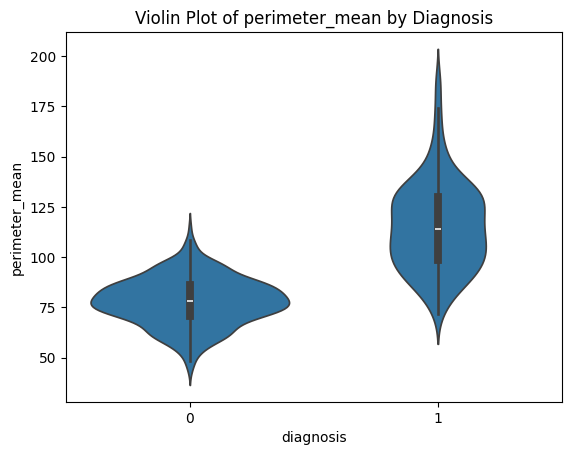

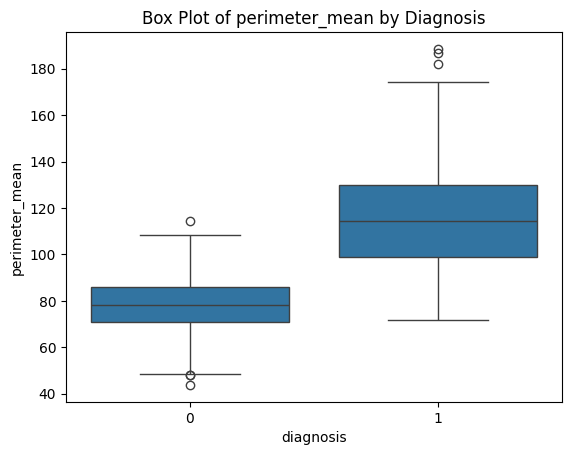

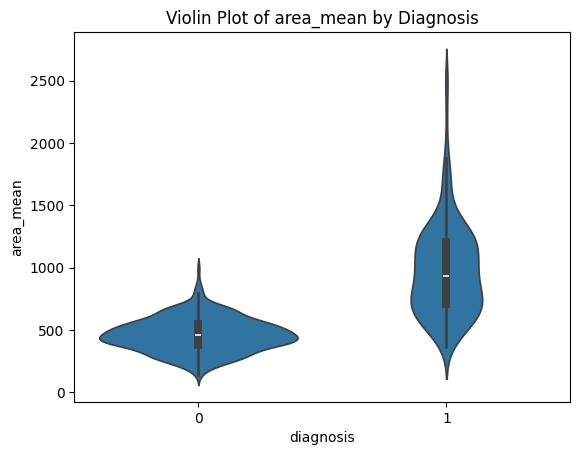

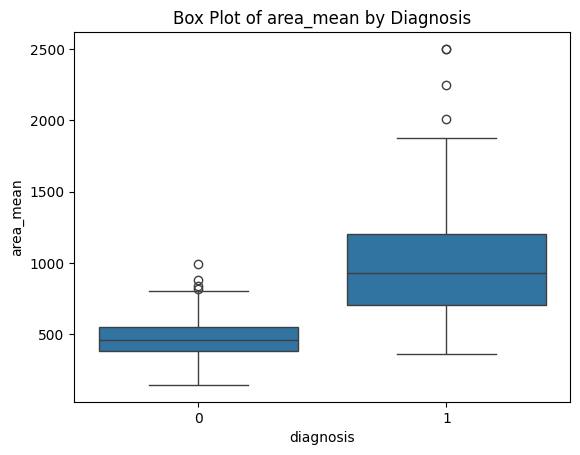

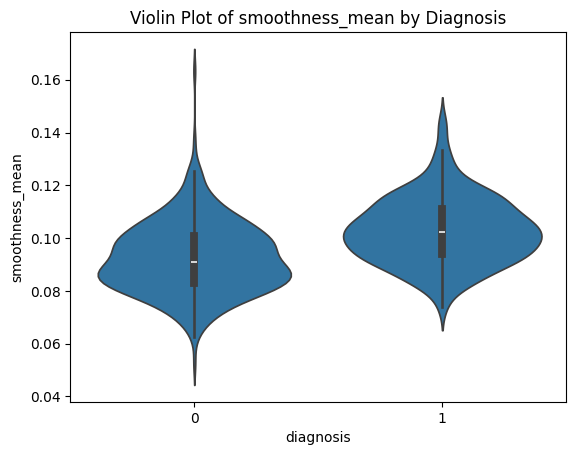

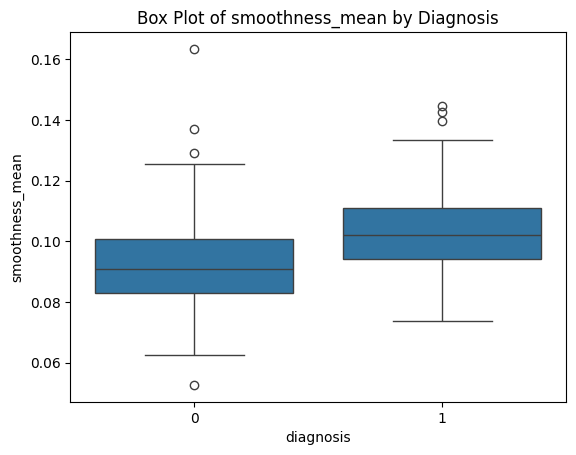

In [ ]:
for column in numerical_cols[:5]:
    sns.violinplot(x='diagnosis', y=column, data=data)
    plt.title(f"Violin Plot of {column} by Diagnosis")
    plt.show()

    sns.boxplot(x='diagnosis', y=column, data=data)
    plt.title(f"Box Plot of {column} by Diagnosis")
    plt.show()


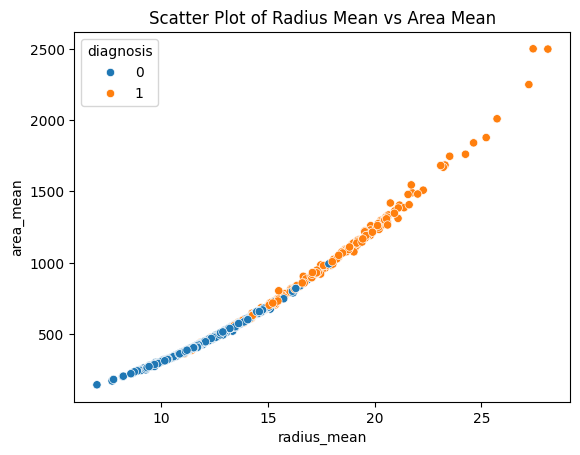

In [ ]:
sns.scatterplot(x='radius_mean', y='area_mean', hue='diagnosis', data=data)
plt.title("Scatter Plot of Radius Mean vs Area Mean")
plt.show()

##Data Discretizing

In [ ]:
def discretize_column(dataframe, column, bins=3, labels=[1, 2, 3]):
    """Discretize a column into bins with labels."""
    return pd.cut(dataframe[column], bins=bins, labels=labels).astype(int)

discretized_data = data.copy()
for column in numerical_cols:
    discretized_data[f"{column}_discrete"] = discretize_column(discretized_data, column)


In [ ]:
for column in numerical_cols:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.clip(data[column], lower_bound, upper_bound)

In [ ]:
discretized_data.to_csv('discretized_data.csv', index=False)
print("Discretized data saved to discretized_data.csv")

Discretized data saved to discretized_data.csv


In [ ]:
display(discretized_data.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst_discrete,texture_worst_discrete,perimeter_worst_discrete,area_worst_discrete,smoothness_worst_discrete,compactness_worst_discrete,concavity_worst_discrete,concave points_worst_discrete,symmetry_worst_discrete,fractal_dimension_worst_discrete
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,2,1,3,2,2,2,2,3,2,2
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,2,1,2,2,2,1,1,2,1,1
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,2,2,2,2,2,2,2,3,2,1
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,1,2,1,1,3,3,2,3,3,3
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,2,1,2,2,2,1,1,2,1,1


In [ ]:
data = data.drop(columns=['id'], errors='ignore')


In [ ]:
data['mean_area_ratio'] = data['area_mean'] / data['radius_mean']


In [ ]:
data.to_csv('cleaned_data.csv', index=False)
print("Cleaned data saved to cleaned_data.csv")

Cleaned data saved to cleaned_data.csv


In [ ]:
display(data.head())

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,mean_area_ratio
0,1,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890,55.642023
1,1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902,64.462810
2,1,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758,61.097004
3,1,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301,33.809107
4,1,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678,63.923115
